In [1]:
# !pip -q install vit-keras
!pip -q install vit_keras tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [2]:
!pip -q install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 48.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.23.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.8.0 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Input weight path
model_WEIGHTS_PATH = '/content/drive/MyDrive/Soil Classification/soil.h5'

In [ ]:
import tensorflow as tf
from vit_keras import vit
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = 224
model_class_names = ['Alluvial Soil', 'Black Soil', 'Cinder Soil', 'Laterite Soil', 'Peat Soil', 'Red Soil', 'Yellow Soil']


def create_model():
    vit_model = vit.vit_b16(
        image_size=IMAGE_SIZE,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False)

    model = tf.keras.Sequential([
        vit_model,
        Flatten(),
        Dense(7, activation='softmax')
    ])

    return model

tea_model = create_model()
tea_model.load_weights(model_WEIGHTS_PATH)

def tea_growth_predict(image_path, model, model_class_names, IMAGE_SIZE):
    # Load the image
    img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    image_np_resized_normalized = np.vstack([img_batch]) / 255.0  # Normalize to [0,1]

    # Predict probabilities
    probabilities = model.predict(image_np_resized_normalized)

    # Get the class with the highest probability
    class_index = np.argmax(probabilities)
    class_label = model_class_names[class_index]

    # Get the confidence score as a percentage
    confidence_score = np.max(probabilities) * 100
    confidence_score = round(confidence_score, 2)

    # Display the image and prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted class: {class_label}")
    plt.show()

    return class_label


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

347512832/347502902 [==============================] - 3s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 14, 14
  warnings.warn(


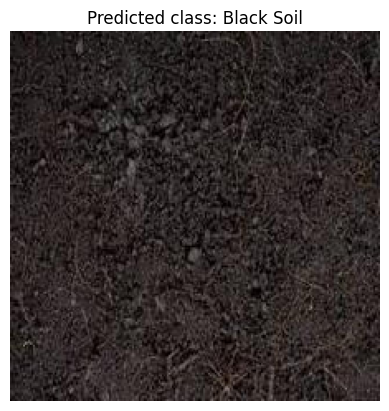

'Black Soil'

In [ ]:
image_path = '/content/drive/MyDrive/Soil Classification/testset/Black Soil/Black_Soil_-4-_jpg.rf.fd0f01018aa36030bf8bebf93ee84db6.jpg'
tea_growth_predict(image_path, tea_model, model_class_names, IMAGE_SIZE)

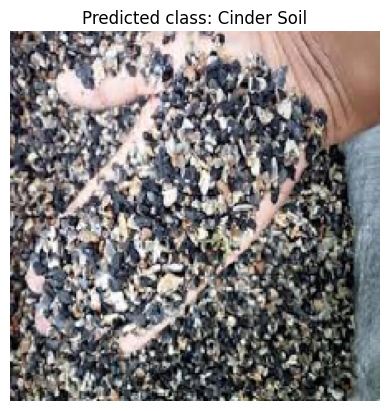

'Cinder Soil'

In [ ]:
image_path = '/content/drive/MyDrive/Soil Classification/testset/Cinder Soil/14-Copy_jpg.rf.e98be594582001644396c8de5f2ac971.jpg'
tea_growth_predict(image_path, tea_model, model_class_names, IMAGE_SIZE)

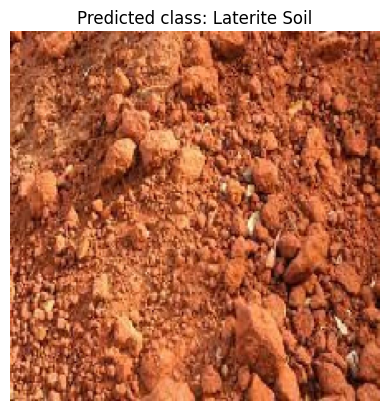

'Laterite Soil'

In [ ]:
image_path = '/content/drive/MyDrive/Soil Classification/testset/Laterite Soil/17_jpg.rf.78226edd0066818f6e734f9ee69b8300.jpg'
tea_growth_predict(image_path, tea_model, model_class_names, IMAGE_SIZE)

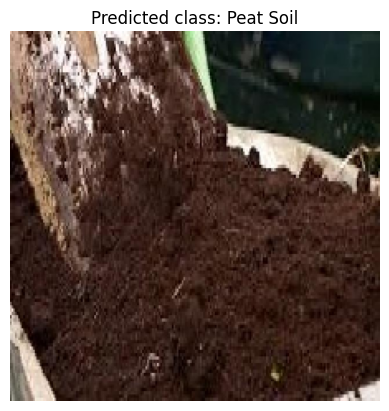

'Peat Soil'

In [ ]:
image_path = '/content/drive/MyDrive/Soil Classification/testset/Peat Soil/29_jpg.rf.517ea7e2356e93455f6ceca45f8b89ea.jpg'
tea_growth_predict(image_path, tea_model, model_class_names, IMAGE_SIZE)

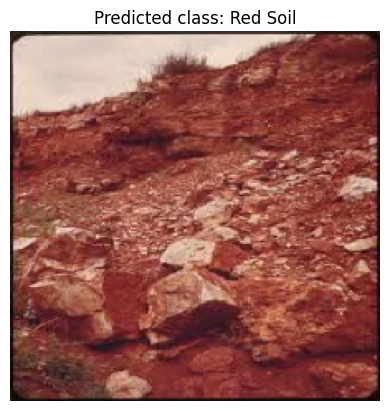

'Red Soil'

In [ ]:
image_path = '/content/drive/MyDrive/Soil Classification/testset/Red Soil/Red_30_jpg.rf.5cf2f433f84325095fa1a3edc0022ef9.jpg'
tea_growth_predict(image_path, tea_model, model_class_names, IMAGE_SIZE)

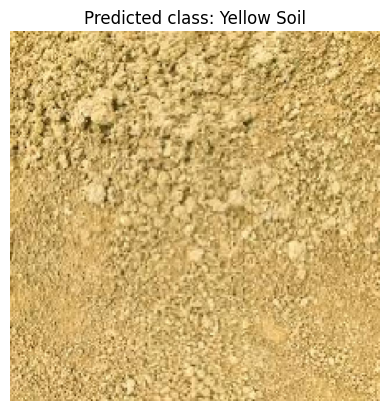

'Yellow Soil'

In [ ]:
image_path = '/content/drive/MyDrive/Soil Classification/testset/Yellow Soil/Yellow_Soil_-14-Copy_jpg.rf.3711c0c8cc3701e218524d6c87f07588.jpg'
tea_growth_predict(image_path, tea_model, model_class_names, IMAGE_SIZE)